In [2]:
"""
Customer Behavior & Revenue Analysis
------------------------------------
Objective:
- Analyze customer behavior
- Identify revenue drivers
- Detect churn risks
- Provide business insights

Author: Baba Falai Ben Youssouf
"""

'\nCustomer Behavior & Revenue Analysis\n------------------------------------\nObjective:\n- Analyze customer behavior\n- Identify revenue drivers\n- Detect churn risks\n- Provide business insights\n\nAuthor: Baba Falai Ben Youssouf\n'

In [ ]:
## importation des dépendances

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [7]:
## chargement de données

In [57]:
customers = pd.read_csv("/Users/benouattara/Documents/python-customer-behavior-analysis/customers.csv", parse_dates=["signup_date"])
products = pd.read_csv("/Users/benouattara/Documents/python-customer-behavior-analysis/products.csv")
orders = pd.read_csv("/Users/benouattara/Documents/python-customer-behavior-analysis/orders.csv", parse_dates=["order_date"])
order_items = pd.read_csv("/Users/benouattara/Documents/python-customer-behavior-analysis/order_items.csv")
activity = pd.read_csv("/Users/benouattara/Documents/python-customer-behavior-analysis/customer_activity.csv")


In [58]:
# verification 

Index(['customer_id', 'gender', 'age', 'country', 'city', 'signup_date',
       'acquisition_channel'],
      dtype='object')

In [60]:
customers.head(), orders.shape, order_items.shape

(   customer_id gender  age  country       city signup_date acquisition_channel
 0            1      M   29   France      Paris  2022-03-15             Organic
 1            2      F   35   France       Lyon  2021-11-20                 Ads
 2            3      M   41   France  Marseille  2020-07-08            Referral
 3            4      F   26  Belgium   Brussels  2023-01-10             Organic
 4            5      M   38  Germany     Berlin  2021-05-02                 Ads,
 (30, 5),
 (20, 4))

In [ ]:
# Analyse des données 

In [ ]:
# chiffre d’affaires

In [61]:
sales = (
    order_items
    .merge(products, on="product_id", how="left")
    .merge(orders[orders["status"] == "Completed"], on="order_id", how="inner")
)

sales["revenue"] = sales["quantity"] * sales["price"]
sales.head()


,order_item_id,order_id,product_id,quantity,product_name,category,price,customer_id,order_date,status,payment_method,revenue
0,1,1001,101,1,Laptop Pro,Electronics,1200,1,2023-02-10,Completed,Credit Card,1200
1,2,1001,102,2,Wireless Mouse,Electronics,25,1,2023-02-10,Completed,Credit Card,50
2,3,1002,103,1,Office Chair,Furniture,180,2,2023-02-11,Completed,PayPal,180
3,4,1003,105,2,Monitor 27,Electronics,320,1,2023-03-05,Completed,Credit Card,640
4,5,1003,107,1,USB-C Hub,Electronics,60,1,2023-03-05,Completed,Credit Card,60


In [ ]:
# KPI globaux

In [62]:
kpis = {
    "Total Revenue (€)": sales["revenue"].sum(),
    "Total Orders": sales["order_id"].nunique(),
    "Total Customers": customers["customer_id"].nunique(),
    "Average Order Value (€)": sales["revenue"].sum() / sales["order_id"].nunique()
}

pd.DataFrame(kpis, index=["Value"]).T


,Value
Total Revenue (€),6815.000000
Total Orders,14.000000
Total Customers,30.000000
Average Order Value (€),486.785714


In [ ]:
# Analyse client

In [ ]:
# Revenu par client (CLV simple)

In [63]:
customer_revenue = (
    sales.groupby("customer_id")["revenue"]
    .sum()
    .reset_index()
    .merge(customers, on="customer_id")
)

customer_revenue.sort_values("revenue", ascending=False).head(10)


,customer_id,revenue,gender,age,country,city,signup_date,acquisition_channel
0,1,1950,M,29,France,Paris,2022-03-15,Organic
3,5,1270,M,38,Germany,Berlin,2021-05-02,Ads
6,8,1200,F,28,France,Paris,2023-02-25,Ads
2,4,450,F,26,Belgium,Brussels,2023-01-10,Organic
11,14,450,F,24,France,Bordeaux,2023-06-01,Ads
5,7,395,M,45,France,Nantes,2019-06-11,Referral
4,6,250,F,33,France,Toulouse,2022-09-18,Organic
12,15,210,M,48,France,Nice,2019-02-21,Referral
1,2,180,F,35,France,Lyon,2021-11-20,Ads
9,12,180,F,40,France,Strasbourg,2020-12-03,Ads


In [ ]:
Identification des clients à forte valeur

Base pour stratégie VIP / fidélisation

In [ ]:
# Distribution du revenu client

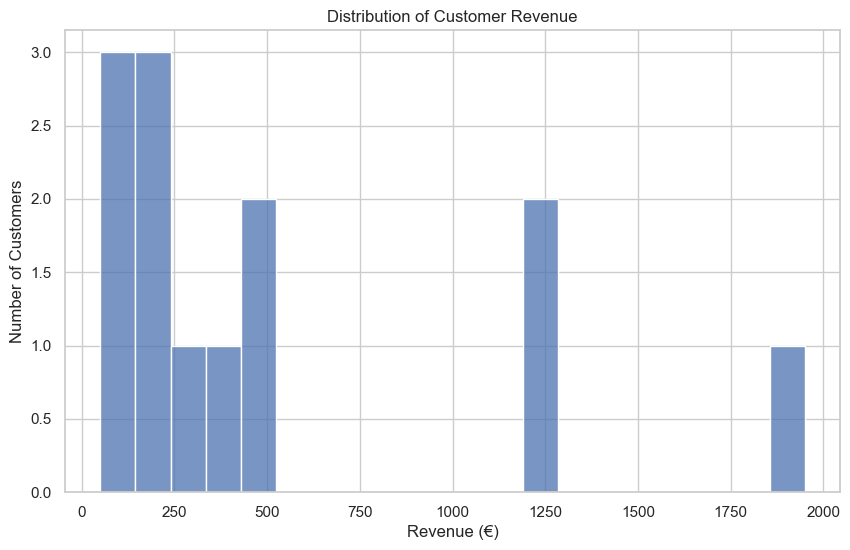

In [64]:
sns.histplot(customer_revenue["revenue"], bins=20)
plt.title("Distribution of Customer Revenue")
plt.xlabel("Revenue (€)")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
Loi de Pareto : peu de clients génèrent beaucoup de CA

In [ ]:
# ANALYSE PRODUITS

In [ ]:
## CA par catégorie

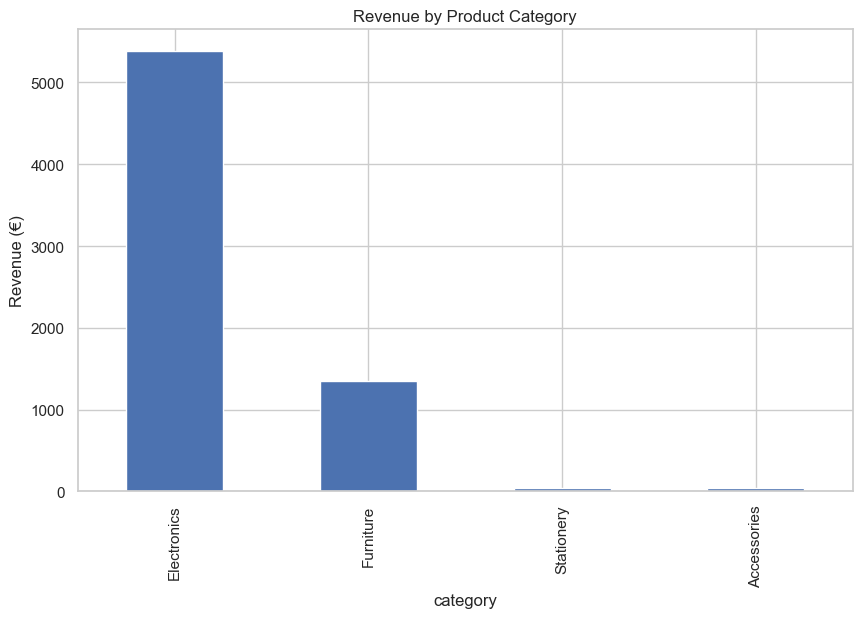

In [65]:
category_revenue = sales.groupby("category")["revenue"].sum().sort_values(ascending=False)

category_revenue.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.ylabel("Revenue (€)")
plt.show()


In [ ]:
Décision business

Prioriser les catégories les plus rentables
Ajuster stock & marketing

In [ ]:
# ANALYSE COMPORTEMENTALE & CHURN

In [ ]:
## Fusion comportement + revenu

In [66]:
customer_full = customer_revenue.merge(activity, on="customer_id", how="left")
customer_full.head()


,customer_id,revenue,gender,age,country,city,signup_date,acquisition_channel,last_login_days,avg_session_duration,nb_sessions,last_purchase_days
0,1,1950,M,29,France,Paris,2022-03-15,Organic,3,12.5,45,20
1,2,180,F,35,France,Lyon,2021-11-20,Ads,40,5.2,12,120
2,4,450,F,26,Belgium,Brussels,2023-01-10,Organic,7,10.8,30,15
3,5,1270,M,38,Germany,Berlin,2021-05-02,Ads,15,8.4,22,40
4,6,250,F,33,France,Toulouse,2022-09-18,Organic,2,14.1,55,10


In [ ]:
# churn risk

In [67]:
customer_full["churn_risk"] = np.where(
    (customer_full["last_login_days"] > 60) &
    (customer_full["last_purchase_days"] > 120),
    "High Risk",
    "Low Risk"
)

customer_full["churn_risk"].value_counts()


churn_risk
Low Risk     11
High Risk     2
Name: count, dtype: int64

In [ ]:
# Revenu vs churn

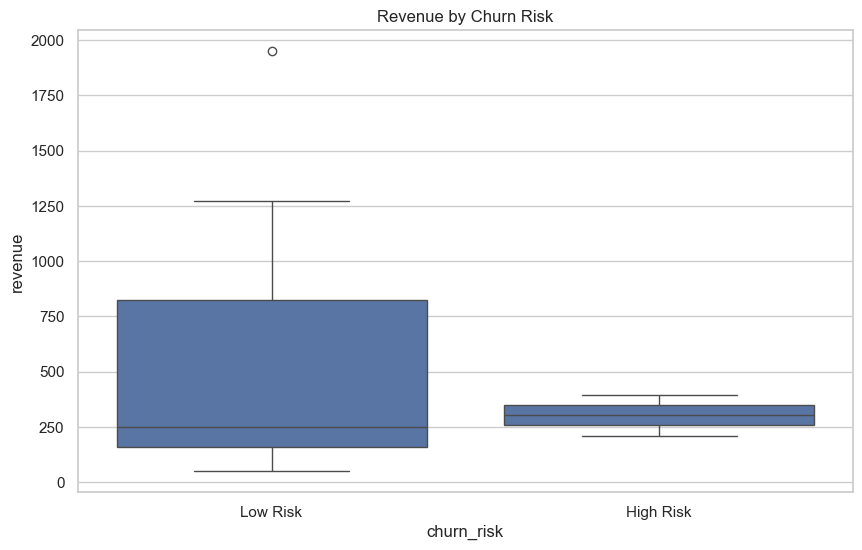

In [68]:
sns.boxplot(x="churn_risk", y="revenue", data=customer_full)
plt.title("Revenue by Churn Risk")
plt.show()


In [ ]:
Les clients à risque génèrent moins de valeur
Opportunité de rétention ciblée

In [ ]:
# ANALYSE ACQUISITION

In [ ]:
## performance par canal

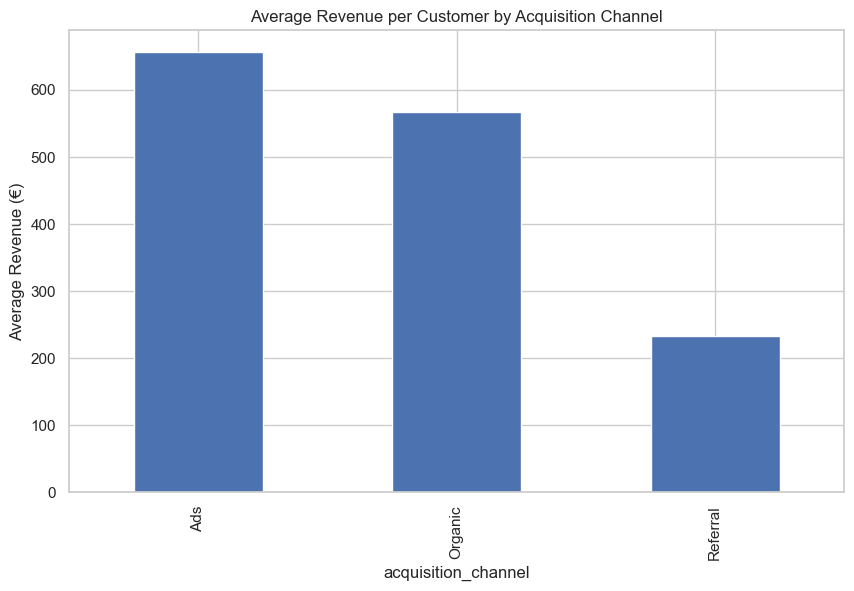

In [69]:
channel_perf = (
    customer_full
    .groupby("acquisition_channel")["revenue"]
    .mean()
    .sort_values(ascending=False)
)

channel_perf.plot(kind="bar")
plt.title("Average Revenue per Customer by Acquisition Channel")
plt.ylabel("Average Revenue (€)")
plt.show()


In [ ]:
Réallouer le budget marketing

In [ ]:
PRINCIPAUX POINTS SAILLANTS :

In [ ]:
- Le chiffre d'affaires est fortement concentré sur un petit nombre de clients.

- Les produits électroniques représentent la majorité des ventes.

- Un faible engagement est fortement corrélé au taux de désabonnement.

- Les canaux organiques et de parrainage attirent des clients à forte valeur ajoutée.

RECOMMANDATIONS :

- Cibler les campagnes de fidélisation sur les clients à forte valeur ajoutée présentant un risque de désabonnement moyen.

- Réduire les dépenses sur les canaux d'acquisition les moins performants.

- Promouvoir les catégories de produits à forte marge.